In [1]:
# Use this cell to regroup all your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import set_config; set_config(display='diagram')
from python_files.data import GetData
from python_files.basic_preprocessing import BasicPreprocessing
from python_files.preprocessing import Advancedprocessing
import xgboost as xgb
import collections

# Load

In [2]:
data = pd.read_csv('../data/AllDataMerged_updated.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8939 entries, 0 to 8938
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           8939 non-null   int64  
 1   budget                       8939 non-null   int64  
 2   genres                       8693 non-null   object 
 3   imdb_id                      8712 non-null   object 
 4   original_language            8938 non-null   object 
 5   production_companies         8939 non-null   object 
 6   production_countries         8939 non-null   object 
 7   release_date                 8918 non-null   object 
 8   revenue                      8939 non-null   int64  
 9   runtime                      8913 non-null   float64
 10  spoken_languages             8856 non-null   object 
 11  status                       8939 non-null   object 
 12  title                        8939 non-null   object 
 13  production_compani

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4f77574ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4f77516580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4f77574c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4f77516a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4f77516d30>],
 'means': []}

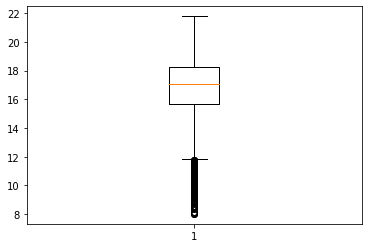

In [4]:
plt.boxplot(np.log(data['revenue']))

In [5]:
q1= data['revenue'].quantile(0.25)
q3= data['revenue'].quantile(0.75)
iqr = q3-q1
outlier = data[data['revenue']<(q1-1.5*iqr)].count()
outlier

id                             0
budget                         0
genres                         0
imdb_id                        0
original_language              0
production_companies           0
production_countries           0
release_date                   0
revenue                        0
runtime                        0
spoken_languages               0
status                         0
title                          0
production_companies_number    0
production_countries_number    0
spoken_languages_number        0
belongs_to_collection          0
actor1_name                    0
actor1_gender                  0
actor2_name                    0
actor2_gender                  0
actor3_name                    0
actor3_gender                  0
actor4_name                    0
actor4_gender                  0
actor5_name                    0
actor5_gender                  0
actor_number                   0
director_name                  0
director_gender                0
director_n

In [6]:
data = data[np.log(data['revenue'])>14]

In [7]:
data.nunique()

id                             7958
budget                          782
genres                         1582
imdb_id                        7785
original_language                51
production_companies           2327
production_countries             82
release_date                   5255
revenue                        5578
runtime                         223
spoken_languages                 60
status                            1
title                          7787
production_companies_number      22
production_countries_number      10
spoken_languages_number          10
belongs_to_collection           776
actor1_name                    3679
actor1_gender                     3
actor2_name                    4758
actor2_gender                     3
actor3_name                    5315
actor3_gender                     3
actor4_name                    5614
actor4_gender                     3
actor5_name                    5687
actor5_gender                     3
actor_number                

In [8]:
data.isnull().sum().sort_values(ascending=False)/len(data)

belongs_to_collection          0.823197
genres                         0.025132
imdb_id                        0.021739
spoken_languages               0.007163
release_date                   0.001885
runtime                        0.001759
director_name                  0.000000
actor4_name                    0.000000
actor4_gender                  0.000000
actor5_name                    0.000000
actor5_gender                  0.000000
actor_number                   0.000000
id                             0.000000
director_gender                0.000000
actor3_name                    0.000000
director_number                0.000000
producer_name                  0.000000
producer_number                0.000000
screeplay_name                 0.000000
actor3_gender                  0.000000
actor1_name                    0.000000
actor2_gender                  0.000000
actor2_name                    0.000000
actor1_gender                  0.000000
budget                         0.000000


In [9]:
data.drop_duplicates(inplace = True)

In [10]:
X = data.drop(columns=['revenue'])
y = data['revenue']

In [11]:
X.head().transpose()

,0,1,2,3,4
id,5,9,11,12,13
budget,4000000,4000000,11000000,94000000,55000000
genres,Crime|Comedy,Drama,Adventure|Action|Science Fiction,Animation|Family,Comedy|Drama|Romance
imdb_id,tt0113101,tt0425473,tt0076759,tt0266543,tt0109830
original_language,en,de,en,en,en
production_companies,Miramax Films,none,Lucasfilm,Pixar Animation Studios,Paramount Pictures
production_countries,United States of America,Germany,United States of America,United States of America,United States of America
release_date,25-12-1995,02-09-2004,25-05-1977,30-05-2003,06-07-1994
runtime,98.0,15.0,121.0,100.0,142.0
spoken_languages,English,Deutsch,English,English,English


We know 2 main strategies to reduce the number of categorical features post-preprocessing:
- **[Remove](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)** features that bring too little explanation to our model. This may require statistical analysis of feature importance 
- **[Ordinally encode](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)** (instead of one-hot-encode) categorical features into integers. However this forces a notion of "order" (1>2>3...) that can be detrimental if not set properly!

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=6)
X_test, X_val , y_val, y_test = train_test_split(X_test, y_test, test_size = 0.50,random_state=6)

In [13]:
len(X_val)

1194

### 1.2 Baseline pipe

#### a) Preprocessing

In [14]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [15]:
num_transformer = make_pipeline(SimpleImputer(strategy='mean'), RobustScaler())

preproc_basic = make_column_transformer(
    (num_transformer, ['budget','runtime',
        'production_companies_number',
       'production_countries_number', 'spoken_languages_number']))

preproc_basic

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['budget', 'runtime',
                                  'production_companies_number',
                                  'production_countries_number',
                                  'spoken_languages_number'])])

#### b) Add estimator

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
pipe_baseline = make_pipeline(preproc_basic, LinearRegression())
pipe_baseline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['budget', 'runtime',
                                                   'production_companies_number',
                                                   'production_countries_number',
                                                   'spoken_languages_number'])])),
                ('linearregression', LinearRegression())])

#### c) Cross-Validate

In [18]:
from sklearn.model_selection import cross_val_score

# Cross-validate Pipeline
score_baseline = cross_val_score(pipe_baseline, X_train, y_train, cv=5, scoring='r2').mean()
score_baseline

0.4921777542405982

## 🏋️‍♀️ 2. ITERATIONS 

**Estimators**

- **Tree-based ensembles (must try today)**: Probably the best suited for problems with many categorical features
- Stacking !
- XGBoost !

**Preprocessing** (once your first ensemble model works)

- Ordinal Encoding of categorical features with a hidden notion of order in their values (e.g. "bad", "average", good")
- Statistical Feature Selection to remove useless features (avoid overfitting and reduce train time)
- Predict `log(SalePrice)` instead?
- ...

### 2.1 Genre Addition ♲ 

In [19]:
from sklearn.base import TransformerMixin, BaseEstimator

class GenreTranformer(TransformerMixin, BaseEstimator): 
    # BaseEstimator generates the get_params() and set_params() methods that all Pipelines require
    # TransformerMixin creates the fit_transform() method from fit() and transform()
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        self.unique_genre_list = []
        for genres in X:
            for genre in genres[0].split('|'):
                if genre not in self.unique_genre_list:
                    self.unique_genre_list.append(genre)
        return self   
    
    def transform(self, X, y=None):
        unique_genre_list = self.unique_genre_list
        genre_transformed = [] 
        for genres in X:
            genre_np = np.zeros((len(unique_genre_list),), dtype=int)
            for target_genre in genres[0].split('|'):
                if target_genre in unique_genre_list:
                        index = unique_genre_list.index(target_genre)
                        genre_np[index] = 1
            genre_transformed.append(list(genre_np))
        return np.array(genre_transformed)

## Cast transformer

In [20]:
class CastTransformer(TransformerMixin, BaseEstimator): 
    # BaseEstimator generates the get_params() and set_params() methods that all Pipelines require
    # TransformerMixin creates the fit_transform() method from fit() and transform()
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
#         for feature_number in range(X.shape[1]):
#         def top_k(feature, k):
#         feature_top_k = np.partition(X[:,0], -k)[-k:]
#         self.popular_actor_list = np.sort(feature_top_k)[::-1]
        return self   
    
    def transform(self, X, y=None):
        popular_actor_list = ['Nicolas Cage',
  'Johnny Depp',
  'Ajith Kumar',
  'Bruce Willis',
  'Tom Cruise',
  'Denzel Washington',
  'Tom Hanks',
  'Adam Sandler',
  'Robert De Niro',
  'John Travolta',
  'Eddie Murphy',
  'John Wayne',
  'Keanu Reeves',
  'Arnold Schwarzenegger',
  'Ben Affleck',
  'Jeff Bridges',
  'George Clooney',
  'Harrison Ford',
  'Matt Damon',
  'Liam Neeson',
  'Kevin Costner',
  'Mark Wahlberg',
  'Clint Eastwood',
  'Jason Statham',
  'Mel Gibson',
  'Jackie Chan',
  'Sylvester Stallone',
  'Meryl Streep',
  'Ben Stiller',
  'Christian Bale']
        popular_director_list = ['Steven Spielberg',
  'Woody Allen',
  'Ridley Scott',
  'Alfred Hitchcock',
  'Clint Eastwood',
  'Steven Soderbergh',
  'Oliver Stone',
  'Martin Scorsese',
  'Robert Rodriguez',
  'John Carpenter',
  'Tim Burton',
  'John Ford',
  'Wes Craven',
  'Francis Ford Coppola',
  'Ron Howard',
  'Roland Emmerich',
  'Robert Zemeckis',
  'Michael Bay',
  'Billy Wilder',
  'Bobby Farrelly',
  'Renny Harlin',
  'Sam Raimi',
  'Peter Jackson',
  'Walter Hill',
  'Tony Scott',
  'Richard Donner',
  'Brian De Palma',
  'Barry Levinson',
  'Spike Lee',
  'John Landis']
        popular_producer_list = ['Joel Silver',
  'Jerry Bruckheimer',
  'Brian Grazer',
  'Neal H. Moritz',
  'Tim Bevan',
  'Luc Besson',
  'John Davis',
  'Michael Bay',
  'Scott Rudin',
  'Arnon Milchan',
  'Danny DeVito',
  'Clint Eastwood',
  'Roger Birnbaum',
  'Ridley Scott',
  'Charles Roven',
  'Steve Golin',
  'Ronnie Screwvala',
  'Albert R. Broccoli',
  'Lawrence Gordon',
  'Walt Disney',
  'Tom Rosenberg',
  'Gale Anne Hurd',
  'Alfred Hitchcock',
  'Lawrence Bender',
  'Kathleen Kennedy',
  'Nick Wechsler',
  'Steven Spielberg',
  'John Hughes',
  'Judd Apatow',
  'Robert Rodriguez']
        popular_prod_company_list = ['Universal Pictures',
  'Paramount Pictures',
  'Twentieth Century Fox Film Corporation',
  'Columbia Pictures',
  'New Line Cinema',
  'Walt Disney Pictures',
  'Warner Bros.',
  'Metro-Goldwyn-Mayer (MGM)',
  'United Artists',
  'Columbia Pictures Corporation',
  'Miramax Films',
  'TriStar Pictures',
  'Village Roadshow Pictures',
  'DreamWorks SKG',
  'Fox Searchlight Pictures',
  'Summit Entertainment',
  'Touchstone Pictures',
  'Orion Pictures',
  'Lions Gate Films',
  'BBC Films',
  'Lionsgate',
  'Imagine Entertainment',
  'The Weinstein Company',
  'Regency Enterprises',
  'RKO Radio Pictures',
  'Hollywood Pictures',
  'Lakeshore Entertainment',
  'StudioCanal',
  'Lucasfilm',
  'Dimension Films']
        actor_transformed = [] 
        director_transformed = []
        producer_transformed = []
        production_company_transformed = []
        actor_np = np.zeros((30,), dtype=int)
        director_np = np.zeros((30,), dtype=int)
        producer_np = np.zeros((30,), dtype=int)
        production_company_np = np.zeros((30,), dtype=int)
#         for actor in X[:,0]:
#             if actor in popular_actor_list:
#                         index = popular_actor_list.index(actor)
#                         actor_np[index] = 1
#             actor_transformed.append(list(actor_np))
        for director in X[:,0]:
            if director in popular_director_list:
                        index = popular_director_list.index(director)
                        director_np[index] = 1
            director_transformed.append(list(director_np))
        for producer in X[:,1]:
            if producer in popular_producer_list:
                        index = popular_producer_list.index(producer)
                        producer_np[index] = 1
            producer_transformed.append(list(producer_np))
        for pc in X[:,2]:
            if pc in popular_prod_company_list:
                        index = popular_prod_company_list.index(pc)
                        production_company_np[index] = 1
            production_company_transformed.append(list(production_company_np))
        return np.concatenate((director_transformed,producer_transformed,production_company_transformed),axis = 1)

In [21]:
list(X_train.columns)

['id',
 'budget',
 'genres',
 'imdb_id',
 'original_language',
 'production_companies',
 'production_countries',
 'release_date',
 'runtime',
 'spoken_languages',
 'status',
 'title',
 'production_companies_number',
 'production_countries_number',
 'spoken_languages_number',
 'belongs_to_collection',
 'actor1_name',
 'actor1_gender',
 'actor2_name',
 'actor2_gender',
 'actor3_name',
 'actor3_gender',
 'actor4_name',
 'actor4_gender',
 'actor5_name',
 'actor5_gender',
 'actor_number',
 'director_name',
 'director_gender',
 'director_number',
 'producer_name',
 'producer_number',
 'screeplay_name',
 'editor_name']

In [22]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
import datetime

class DataframeTransformer:
    @staticmethod
    def names(X):
        return list(X_train.columns)
        

    @staticmethod
    def transformer(X):
        
        X['release_date'] = pd.to_datetime(X['release_date'],infer_datetime_format=True)
        
        X['belongs_to_collection_updated'] = X['belongs_to_collection'].apply(lambda x: 0 if pd.isnull(x) else 1)
        # add weekday
        X['release_weekday'] = X['release_date'].dt.day_name()
        #Log of budget
        X['log_budget'] = np.log(X['budget'])
        #find age of movie
        now = pd.to_datetime('now')
        X['release_age'] = (now - X['release_date']).astype('<m8[Y]')

        X['week_sin'] = np.sin(2 * np.pi * X['release_date'].dt.isocalendar().week/52)

        X['week_cos'] = np.cos(2 * np.pi * X['release_date'].dt.isocalendar().week/52)
        return X

In [23]:
X_train.shape

(5570, 34)

In [26]:
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
cast_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'), CastTransformer())
cat_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore',sparse=False))
num_transformer = make_pipeline(SimpleImputer(strategy='mean'), RobustScaler())
cyclic_transformer = make_pipeline(SimpleImputer(strategy='mean'))
genre_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'), GenreTranformer())

basic_prepoc_steps = FunctionTransformer(lambda df: DataframeTransformer.transformer(df))

processing_pipeline = ColumnTransformer([
    ('Numerical Features Transformer',num_transformer, ['log_budget','release_age','runtime','production_companies_number','production_countries_number','actor_number','producer_number','director_number']),
    ('Genres Transformer',genre_transformer,['genres']),
    ('Cast Transformer',cast_transformer,['director_name','producer_name','production_companies'] ),
    ('Cyclic Transformer',cyclic_transformer,['week_cos','week_sin']),
    ('Category_Transformer', cat_transformer, [ 'production_countries','belongs_to_collection_updated','actor1_gender','editor_name'])
])
feature_selector = SelectPercentile(
    mutual_info_regression,
    percentile=25, # keep only 25% of all features
)


union = Pipeline([
    ('basic_prepoc',basic_prepoc_steps),
    ('processing_pipeline', processing_pipeline),
#     ('select percentile',feature_selector)
#     ('linear_reg',LinearRegression())
])
union

Pipeline(steps=[('basic_prepoc',
                 FunctionTransformer(func=<function <lambda> at 0x7f4f771c7d30>)),
                ('processing_pipeline',
                 ColumnTransformer(transformers=[('Numerical Features '
                                                  'Transformer',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['log_budget', 'release_age',
                                                   'runtime',
                                                   'production_companies_number',
                                                   'production_cou...
                                                 ('Cyclic Transformer',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['week_cos', 'week_sin']),
                                                 ('Category_Transformer',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['production_countries',
                                                   'belongs_to_collection_updated',
                                                   'actor1_gender',
                                                   'editor_name'])]))])

In [28]:
union.fit(X_train)

Pipeline(steps=[('basic_prepoc',
                 FunctionTransformer(func=<function <lambda> at 0x7f4f771c7d30>)),
                ('processing_pipeline',
                 ColumnTransformer(transformers=[('Numerical Features '
                                                  'Transformer',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['log_budget', 'release_age',
                                                   'runtime',
                                                   'production_companies_number',
                                                   'production_cou...
                                                 ('Cyclic Transformer',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['week_cos', 'week_sin']),
                                                 ('Category_Transformer',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['production_countries',
                                                   'belongs_to_collection_updated',
                                                   'actor1_gender',
                                                   'editor_name'])]))])

In [29]:
# corr_num = X_train_transformed[['log_budget','release_age','runtime','production_companies_number','production_countries_number', 'spoken_languages_number','actor_number','producer_number','director_number','week_cos','week_sin']].corr()
# plt.figure(figsize=(7,5))
# sns.heatmap(corr_num, cmap='coolwarm',vmin=-1, vmax=1);


In [30]:
# # Converting the correlation matrix into a DataFrame
# corr_df = corr_num.stack().reset_index()

# # Renaming the columns
# corr_df.columns = ['feature_1','feature_2', 'correlation']

# # Remove "self correlations"
# no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
# corr_df = corr_df[no_self_correlation]
# # Computing the absolute correlation
# corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

# # Showing the top 5 most correlated pairs of feature
# corr_df.sort_values(by="absolute_correlation", ascending=False).head(5*2)

In [31]:
# union.get_feature_names_out()

In [32]:
X_train_transformed = pd.DataFrame(union.transform(X_train))
X_val_transformed = pd.DataFrame(union.transform(X_val))
X_test_transformed = pd.DataFrame(union.transform(X_test))

In [33]:
X_train_transformed.describe()

,0,1,2,3,4,5,6,7,8,9,...,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774
count,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.00000,...,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000
mean,-0.108360,0.390965,0.095537,0.126750,0.247935,0.343848,0.212448,0.043806,0.226930,0.14237,...,0.000359,0.000359,0.000718,0.000180,0.000180,0.001077,0.000180,0.373968,0.000180,0.000180
std,0.786978,1.133851,1.197324,1.038106,0.768920,1.332270,0.542141,0.454287,0.418885,0.34946,...,0.018947,0.018947,0.026791,0.013399,0.013399,0.032806,0.013399,0.483899,0.013399,0.013399
min,-3.520450,-0.882353,-3.922330,-1.000000,-1.000000,-1.076923,-0.333333,-1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.560554,-0.294118,-0.417476,-0.500000,0.000000,-0.384615,-0.333333,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.439446,0.705882,0.582524,0.500000,0.000000,0.615385,0.666667,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.678409,6.764706,17.514563,10.000000,8.000000,15.307692,3.333333,11.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca_x_train = pca.fit_transform(X_train_transformed)
pca_x_val = pca.transform(X_val_transformed)
pca_x_test = pca.transform(X_test_transformed)
pca.explained_variance_ratio_

array([0.16126931, 0.15353944, 0.0815281 , 0.06893329, 0.05574357,
       0.04457494, 0.03300543, 0.03083085, 0.02726123, 0.02582376,
       0.02175353, 0.0197874 , 0.01846617, 0.01741946, 0.0169199 ,
       0.01261128, 0.01202682, 0.01169372, 0.01118025, 0.00936824])

In [35]:
y_train_transformed = y_train.apply(lambda x: np.log(1+x))
y_val_transformed = y_val.apply(lambda x: np.log(1+x))
y_test_transformed = y_test.apply(lambda x: np.log(1+x))

## Models

**XGB Regresssor**

In [36]:
from xgboost import XGBRegressor

In [37]:
model_xgb = XGBRegressor(max_depth=6, n_estimators=2000, learning_rate=0.003)

In [38]:
pipe_xgb = make_pipeline(union, model_xgb)
pipe_xgb

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('basic_prepoc',
                                  FunctionTransformer(func=<function <lambda> at 0x7f4f771c7d30>)),
                                 ('processing_pipeline',
                                  ColumnTransformer(transformers=[('Numerical '
                                                                   'Features '
                                                                   'Transformer',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('robustscaler',
                                                                                    RobustScaler())]),
                                                                   ['log_budget',
                                                                    'release_age',
                                                                    'runtime',
                                                                    'production_com...
                              interaction_constraints=None, learning_rate=0.003,
                              max_delta_step=None, max_depth=6,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=2000,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, reg_alpha=None,
                              reg_lambda=None, scale_pos_weight=None,
                              subsample=None, tree_method=None,
                              validate_parameters=None, verbosity=None))])

In [39]:
# from sklearn.metrics import mean_squared_error, r2_score, make_scorer
# cross_val_score(model_xgb,X_train_transformed,y_train_transformed,cv=5,scoring=make_scorer(mean_squared_error),n_jobs=-1).mean()

Best Validation Score 1.871077


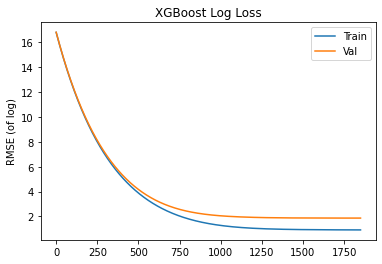

In [40]:
# Option 2: Use XGBoost Library to fit it
# It allows you to use an `early_stopping` criteria with a Train/Val slit
# X_train_preproc = preproc.fit_transform(X_train, y_train_log)
# X_eval_preproc = preproc.transform(X_eval)

model_xgb.fit(X_train_transformed, y_train_transformed,
        verbose=False,
        eval_set=[(X_train_transformed, y_train_transformed), (X_val_transformed, y_val_transformed)],
        eval_metric=["rmse"],
        early_stopping_rounds=10)

# retrieve performance metrics
results = model_xgb.evals_result()
epochs = len(results['validation_0']["rmse"])
x_axis = range(0, epochs)

# plot rmsle loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Val')
ax.legend(); plt.ylabel('RMSE (of log)'); plt.title('XGBoost Log Loss')

print("Best Validation Score", min(results['validation_1']['rmse']))

In [41]:
y_pred = model_xgb.predict(X_test_transformed)

In [42]:
y_pred

array([17.45587 , 18.659357, 16.084436, ..., 19.127285, 16.923765,
       15.470709], dtype=float32)

In [43]:
# Regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import math
mse = mean_squared_error(y_test_transformed, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test_transformed, y_pred)
rsquared = r2_score(y_test_transformed, y_pred)
max_error = max_error(y_test_transformed, y_pred)
print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('R2 =', round(rsquared, 2))
print('Max Error =', round(max_error, 2))

MSE = 3.4
RMSE = 1.84
MAE = 1.49
R2 = -0.6
Max Error = 5.06


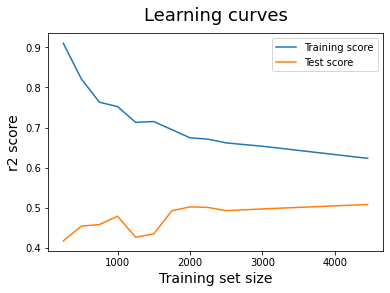

In [44]:
from sklearn.model_selection import learning_curve
# Set training size
train_sizes = [250,500,750,1000,1250,1500,1750,2000,2250,2500,3000,4456]
# Get train scores(R2), train sizes and validation scores using 'Learning curve'
train_sizes, train_scores, test_scores = learning_curve(
estimator=xgb.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 15, seed = 50), X=X_train_transformed, y=y_train_transformed, train_sizes=train_sizes, cv=5)
# Take the mean of corss-validated train scores and test scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
# Plot scores
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

In [45]:
comp_df = pd.DataFrame({"actual": np.expm1(y_test_transformed), "predictions": np.expm1(y_pred)})
# Add actual values to dataframe
# comp_df['actual'] = np.expm1(y_cross)
# Add column with difference of the two values
comp_df['difference'] = comp_df['predictions'] - comp_df['actual']
# Add column that shows the percent difference between predicted and actual value
comp_df['percent_diff'] = abs(abs(comp_df['predictions'] / (comp_df['actual'])) - 1) * 100
# Add column that designates a difference of less than 20% as 'okay' and 20% or more as 'bad'
comp_df['okay'] = comp_df['percent_diff'].apply(lambda x: 'okay' if x < 20 else 'bad')
comp_df

,actual,predictions,difference,percent_diff,okay
7332,301000000.0,38105516.0,-262894484.0,87.340360,bad
8283,311594032.0,126956752.0,-184637280.0,59.255718,bad
7131,28931401.0,9669008.0,-19262393.0,66.579538,bad
380,51881013.0,54713404.0,2832391.0,5.459398,okay
4222,18671317.0,7076892.0,-11594425.0,62.097521,bad
...,...,...,...,...,...
412,611899420.0,18392984.0,-593506436.0,96.994116,bad
5195,5555305.0,54764144.0,49208839.0,885.799052,bad
622,13760640.0,202709600.0,188948960.0,1373.111716,bad
4569,8279017.0,22381944.0,14102927.0,170.345429,bad


In [46]:
comp_df[comp_df['okay']=='okay']

,actual,predictions,difference,percent_diff,okay
380,51881013.0,54713404.0,2832391.0,5.459398,okay
4620,126737428.0,135457792.0,8720364.0,6.880654,okay
3319,22211426.0,23320776.0,1109350.0,4.994501,okay
4189,21300000.0,18105894.0,-3194106.0,14.995803,okay
5662,75597042.0,83841136.0,8244094.0,10.905313,okay
...,...,...,...,...,...
2419,84146832.0,92807752.0,8660920.0,10.292628,okay
2724,25819961.0,20942920.0,-4877041.0,18.888646,okay
4324,36359037.0,29344294.0,-7014743.0,19.292983,okay
6708,7385434.0,7063777.5,-321656.5,4.355282,okay


In [47]:
comp_df['percent_diff'].describe()

count     1194.000000
mean       477.907682
std       1269.583281
min          0.087557
25%         53.733103
50%         87.769284
75%        274.030713
max      15585.529580
Name: percent_diff, dtype: float64

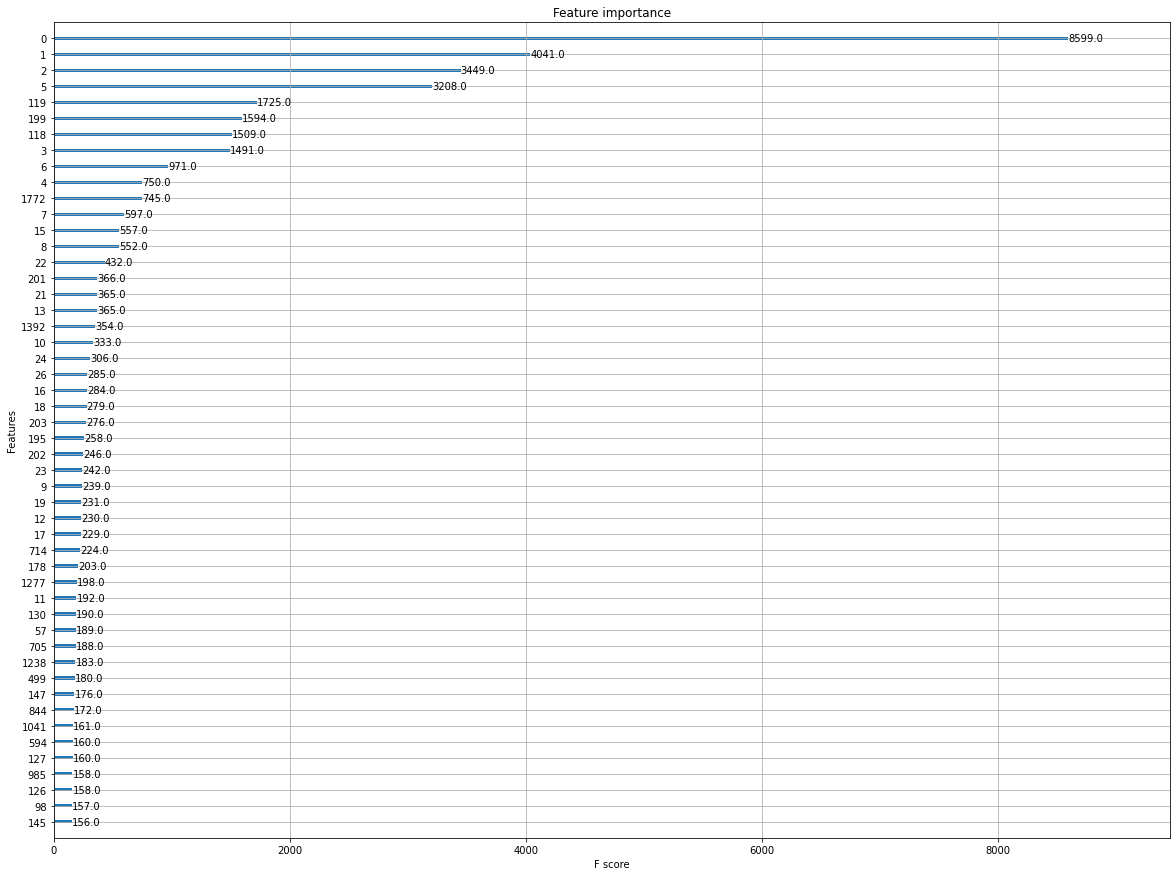

In [48]:
# Plot feature importance
fig, ax = plt.subplots(figsize=(20, 15))
xgb.plot_importance(model_xgb, max_num_features=50, importance_type='weight', ax=ax);

<AxesSubplot:ylabel='actual'>

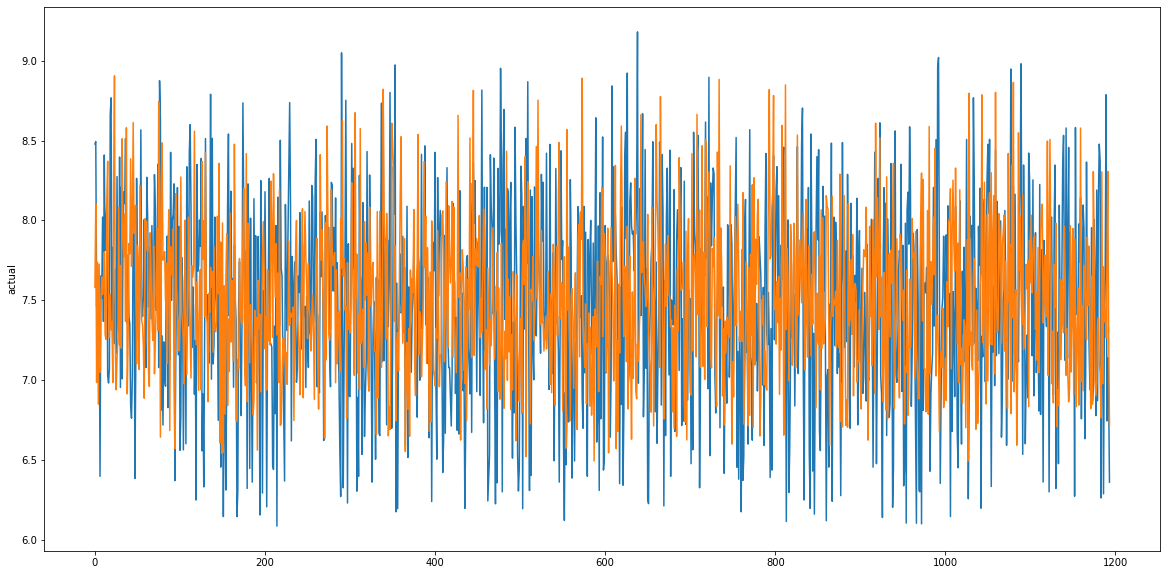

In [49]:
plt.figure(figsize=(20, 10))
sns.lineplot(y=np.log10(comp_df['actual']), x=range(len(comp_df)))
sns.lineplot(y=np.log10(comp_df['predictions']), x=range(len(comp_df)))

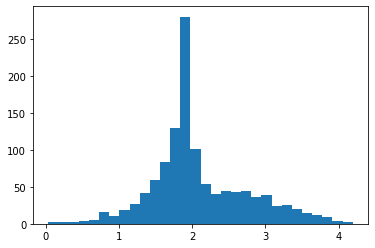

In [50]:
_ = plt.hist(np.log10(comp_df['percent_diff']+1),bins = 30)

### **PCA**

In [51]:
from sklearn.decomposition import TruncatedSVD

# Apply SVD
svd = TruncatedSVD(n_components=201)
latent_df = svd.fit_transform(X_train_transformed)

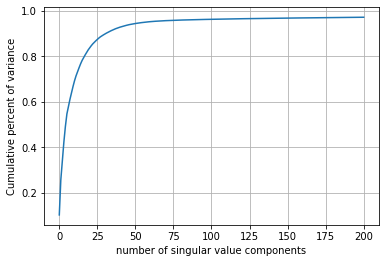

In [52]:
plt.show()
# Plot variance as a function of the number of components.
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(X_train_transformed)

PCA(n_components=50)

In [54]:
X_train_transformed.shape

(5570, 1775)

In [56]:
X_proj = pca.transform(X_train_transformed)
# X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 51)])
X_proj
# pca_x_test = pca.transform(X_test_transformed)
# pca.explained_variance_ratio_

array([[ 4.95704364e+00,  6.12213092e+00,  2.11302915e+00, ...,
        -3.95922530e-02, -7.29452313e-02,  2.32395273e-01],
       [ 5.31816008e+00,  5.06107341e+00,  1.49880049e+00, ...,
         2.06531689e-01,  1.45163125e-02,  2.61527643e-01],
       [ 5.95221783e+00,  3.43865047e+00,  3.42414225e-01, ...,
        -4.38636692e-02, -8.01865156e-02,  2.32803717e-01],
       ...,
       [-1.20698004e+00,  8.31733372e-01, -7.13141759e-02, ...,
         1.13436954e-02, -4.89612192e-03,  4.67211435e-02],
       [-9.92142926e-01,  2.42042715e-01,  2.34710027e-02, ...,
        -1.81890363e-02, -1.96940179e-02, -8.03885628e-03],
       [-1.33153036e+00,  1.21548181e+00, -1.89536861e+00, ...,
        -3.59835137e-02,  1.43827981e-01, -4.87984704e-02]])

In [57]:
X_val_proj = pca.transform(X_val_transformed)
X_test_proj = pca.transform(X_test_transformed)

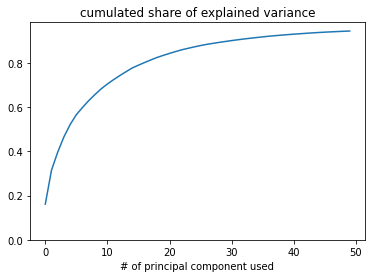

In [58]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

Best Validation Score 1.827578


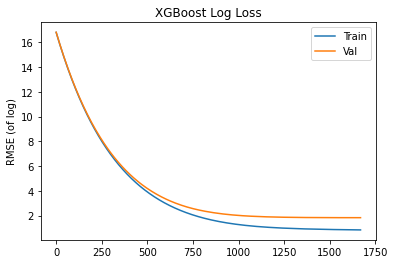

In [59]:
# Option 2: Use XGBoost Library to fit it
# It allows you to use an `early_stopping` criteria with a Train/Val slit
# X_train_preproc = preproc.fit_transform(X_train, y_train_log)
# X_eval_preproc = preproc.transform(X_eval)

model_xgb.fit(X_proj, y_train_transformed,
        verbose=False,
        eval_set=[(X_proj, y_train_transformed), (X_val_proj, y_val_transformed)],
        eval_metric=["rmse"],
        early_stopping_rounds=10)

# retrieve performance metrics
results = model_xgb.evals_result()
epochs = len(results['validation_0']["rmse"])
x_axis = range(0, epochs)

# plot rmsle loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Val')
ax.legend(); plt.ylabel('RMSE (of log)'); plt.title('XGBoost Log Loss')

print("Best Validation Score", min(results['validation_1']['rmse']))

In [60]:
y_pred = model_xgb.predict(X_test_proj)

In [61]:
y_pred.shape

(1194,)

In [62]:
# Regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import math
mse = mean_squared_error(y_test_transformed, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test_transformed, y_pred)
rsquared = r2_score(y_test_transformed, y_pred)
max_error = max_error(y_test_transformed, y_pred)
print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('R2 =', round(rsquared, 2))
print('Max Error =', round(max_error, 2))

MSE = 3.14
RMSE = 1.77
MAE = 1.44
R2 = -0.48
Max Error = 5.2


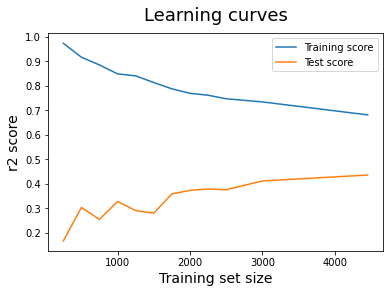

In [63]:
from sklearn.model_selection import learning_curve
# Set training size
train_sizes = [250,500,750,1000,1250,1500,1750,2000,2250,2500,3000,4456]
# Get train scores(R2), train sizes and validation scores using 'Learning curve'
train_sizes, train_scores, test_scores = learning_curve(
estimator=xgb.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 15, seed = 50), X=X_proj, y=y_train_transformed, train_sizes=train_sizes, cv=5)
# Take the mean of corss-validated train scores and test scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
# Plot scores
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

In [64]:
comp_df = pd.DataFrame({"actual": np.expm1(y_test_transformed), "predictions": np.expm1(y_pred)})
# Add actual values to dataframe
# comp_df['actual'] = np.expm1(y_cross)
# Add column with difference of the two values
comp_df['difference'] = comp_df['predictions'] - comp_df['actual']
# Add column that shows the percent difference between predicted and actual value
comp_df['percent_diff'] = abs(abs(comp_df['predictions'] / (comp_df['actual'])) - 1) * 100
# Add column that designates a difference of less than 20% as 'okay' and 20% or more as 'bad'
comp_df['okay'] = comp_df['percent_diff'].apply(lambda x: 'okay' if x < 20 else 'bad')
comp_df

,actual,predictions,difference,percent_diff,okay
7332,301000000.0,29910504.0,-271089496.0,90.062955,bad
8283,311594032.0,112178576.0,-199415456.0,63.998484,bad
7131,28931401.0,8680619.0,-20250782.0,69.995857,bad
380,51881013.0,28221100.0,-23659913.0,45.604185,bad
4222,18671317.0,7387668.5,-11283648.5,60.433062,bad
...,...,...,...,...,...
412,611899420.0,11340735.0,-600558685.0,98.146634,bad
5195,5555305.0,60269868.0,54714563.0,984.906553,bad
622,13760640.0,59707388.0,45946748.0,333.899790,bad
4569,8279017.0,17229410.0,8950393.0,108.109369,bad


In [68]:
comp_df[comp_df['percent_diff']<20]

,actual,predictions,difference,percent_diff,okay
5662,75597042.0,68200728.0,-7396314.0,9.783867,okay
873,127392239.0,122467920.0,-4924319.0,3.865478,okay
5020,45479110.0,51859248.0,6380138.0,14.028722,okay
2649,68106245.0,58948892.0,-9157353.0,13.445688,okay
3735,51842679.0,60984732.0,9142053.0,17.634222,okay
...,...,...,...,...,...
6300,8100000.0,7998677.0,-101323.0,1.250901,okay
4938,26381221.0,30826844.0,4445623.0,16.851468,okay
2855,43545364.0,39414828.0,-4130536.0,9.485593,okay
2949,22400154.0,21639064.0,-761090.0,3.397700,okay


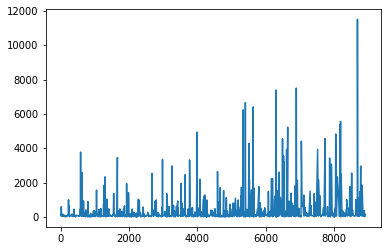

In [66]:
plt.plot(comp_df['percent_diff'].sort_index())

In [67]:
comp_df[comp_df['okay']=='okay']

,actual,predictions,difference,percent_diff,okay
5662,75597042.0,68200728.0,-7396314.0,9.783867,okay
873,127392239.0,122467920.0,-4924319.0,3.865478,okay
5020,45479110.0,51859248.0,6380138.0,14.028722,okay
2649,68106245.0,58948892.0,-9157353.0,13.445688,okay
3735,51842679.0,60984732.0,9142053.0,17.634222,okay
...,...,...,...,...,...
6300,8100000.0,7998677.0,-101323.0,1.250901,okay
4938,26381221.0,30826844.0,4445623.0,16.851468,okay
2855,43545364.0,39414828.0,-4130536.0,9.485593,okay
2949,22400154.0,21639064.0,-761090.0,3.397700,okay


#### XGBoost

In [ ]:
# Create DMatrix for train set, cross-validation set and test set (which is X_cross)
train_set = xgb.DMatrix(X_train_transformed, label=y_train_transformed)
val_set = xgb.DMatrix(X_val_transformed, label=y_val_transformed)
test_set = xgb.DMatrix(X_test_transformed, label=y_test_transformed)

# Define the initial parameters to use (default values)
parameters_xgb = {'learning_rate': 0.3, 
                  'max_depth': 6, 
                  'alpha': 0, 
                  'subsample': 1,
                  'min_child_weight': 1, 
                  'colsample_bytree': 1} 

# Define the variations of each parameter to be checked
learning_rate = [0.3, 0.1, 0.01]
max_depth = [6, 8, 10]
alpha = [0, 5, 10]
subsample = [0.5, 0.7, 1]
min_child_weight = [1, 3, 6]
colsample_bytree = [0.5, 0.7, 1]

In [ ]:
# This code was adapted from https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f
def grid_search_xgb(param1, param2, param1_vals, param2_vals):
    '''
    Function to simulate gridsearch on XGBoost model testing two different values at a time
    Args: param1 = string; name of first parameter
          param2 = string; name of second parameter
          param1_vals = list; values to be checked
          param2_vals = list; values to be checked
    Returns: None
    '''
    
    min_rmse = float("Inf")
    best_parameters = None
    overall_best = collections.defaultdict()

    for val1 in param1_vals:
        for val2 in param2_vals:
            parameters_xgb[param1] = val1
            parameters_xgb[param2] = val2
            cv_results_xgb = xgb.cv(params = parameters_xgb,
                                dtrain=train_set,
                                num_boost_round=1000,
                                seed=42,
                                nfold=5,
                                metrics={'rmse'},
                                early_stopping_rounds=15)

            best_rmse = cv_results_xgb['test-rmse-mean'].min() 
            boost_rounds = cv_results_xgb['test-rmse-mean'].idxmin()
            print('{}: {}, {}: {}'.format(param1, val1, param2, val2))
            print('\tRSME {} for {} rounds'.format(best_rmse, boost_rounds))
            
            if best_rmse < min_rmse:
                min_rmse = best_rmse
                best_parameters = (val1, val2)
        
        print('Best params: {} of {}, {} of {}, RMSE: {}'.format(param1, 
                                                                 best_parameters[0], 
                                                                 param2, 
                                                                 best_parameters[1], 
                                                                 min_rmse))

In [ ]:
# Gridsearch through learning_rate and max_depth values for XGBoost model
# grid_search_xgb('learning_rate', 'max_depth', learning_rate, max_depth)

In [ ]:
parameters_xgb = {'learning_rate': 0.01, 
                  'max_depth': 6, 
                  'alpha': 0, 
                  'subsample': 0.7,
                  'min_child_weight': 3, 
                  'colsample_bytree': 0.7} 

In [ ]:
# Predicting values
val_set = xgb.DMatrix(X_val_transformed, label=y_val_transformed)
test_set = xgb.DMatrix(X_test_transformed, label=y_test_transformed)

clf_xgb = xgb.train(params = parameters_xgb,
                  dtrain = train_set,
                  num_boost_round=1000,
                  evals=[(val_set, "Test")],
                  early_stopping_rounds=100)

y_pred_xgb = clf_xgb.predict(test_set)

In [ ]:
comp_df = pd.DataFrame({"actual": np.expm1(y_test_transformed), "predictions": np.expm1(clf_xgb.predict(test_set))})
# Add actual values to dataframe
# comp_df['actual'] = np.expm1(y_cross)
# Add column with difference of the two values
comp_df['difference'] = comp_df['predictions'] - comp_df['actual']
# Add column that shows the percent difference between predicted and actual value
comp_df['percent_diff'] = abs(abs(comp_df['predictions'] / (comp_df['actual'])) - 1) * 100
# Add column that designates a difference of less than 20% as 'okay' and 20% or more as 'bad'
comp_df['okay'] = comp_df['percent_diff'].apply(lambda x: 'okay' if x < 20 else 'bad')
comp_df

In [ ]:
comp_df['percent_diff'].describe()

In [ ]:
plt.hist(comp_df['percent_diff'],bins = 20)

In [ ]:
# Which movies had a difference of less than 20% in the predicted vs. the actual revenue value
comp_df[comp_df['okay'] == 'okay'].sort_values('percent_diff').reset_index()

In [ ]:
# final_model = Pipeline([('processing_final', union),
#                          ('xgb_model', clf_xgb)])

In [ ]:
# # Saving the best XGBoost model
# pickle.dump(clf_xgb, open('xgboost.sav', 'wb'))

In [ ]:
# from sklearn.model_selection import GridSearchCV
# grid_search = GridSearchCV(
#     pipe_baseline, 
#     tree_para = {'criterion':['gini','entropy', 'log_loss'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]},
#     cv=5,
#     scoring="rmsle_neg")

# grid_search.fit(X, y)X_train_transformed = pd.DataFrame(union.transform(X_train))
X_test_transformed = pd.DataFrame(union.transform(X_test))

y_train_transformed = y_train.apply(lambda x: np.log(1+x))
y_test_transformed = y_test.apply(lambda x: np.log(1+x))

## Models

X_cross = X_test_transformed
y_cross = y_test_transformed

# Create validation sets
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train_transformed, 
                                                              y_train_transformed, 
                                                              test_size = 0.2,
                                                              random_state = 42)

# Print split result
print(X_train_part.shape)
print(X_val.shape)
print(y_train_part.shape)
print(y_val.shape)

#### XGBoost

# Create DMatrix for train set, cross-validation set and test set (which is X_cross)
train_set = xgb.DMatrix(X_train_part, label=y_train_part)
test_set = xgb.DMatrix(X_val, label=y_val)
cross_set = xgb.DMatrix(X_cross, label=y_cross)

# Define the initial parameters to use (default values)
parameters_xgb = {'learning_rate': 0.3, 
                  'max_depth': 6, 
                  'alpha': 0, 
                  'subsample': 1,
                  'min_child_weight': 1, 
                  'colsample_bytree': 1} 

# Define the variations of each parameter to be checked
learning_rate = [0.3, 0.1, 0.01]
max_depth = [6, 8, 10]
alpha = [0, 5, 10]
subsample = [0.5, 0.7, 1]
min_child_weight = [1, 3, 6]
colsample_bytree = [0.5, 0.7, 1]

# This code was adapted from https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f
def grid_search_xgb(param1, param2, param1_vals, param2_vals):
    '''
    Function to simulate gridsearch on XGBoost model testing two different values at a time
    Args: param1 = string; name of first parameter
          param2 = string; name of second parameter
          param1_vals = list; values to be checked
          param2_vals = list; values to be checked
    Returns: None
    '''
    
    min_rmse = float("Inf")
    best_parameters = None
    overall_best = collections.defaultdict()

    for val1 in param1_vals:
        for val2 in param2_vals:
            parameters_xgb[param1] = val1
            parameters_xgb[param2] = val2
            cv_results_xgb = xgb.cv(params = parameters_xgb,
                                dtrain=train_set,
                                num_boost_round=1000,
                                seed=42,
                                nfold=5,
                                metrics={'rmse'},
                                early_stopping_rounds=15)

            best_rmse = cv_results_xgb['test-rmse-mean'].min() 
            boost_rounds = cv_results_xgb['test-rmse-mean'].idxmin()
            print('{}: {}, {}: {}'.format(param1, val1, param2, val2))
            print('\tRSME {} for {} rounds'.format(best_rmse, boost_rounds))
            
            if best_rmse < min_rmse:
                min_rmse = best_rmse
                best_parameters = (val1, val2)
        
        print('Best params: {} of {}, {} of {}, RMSE: {}'.format(param1, 
                                                                 best_parameters[0], 
                                                                 param2, 
                                                                 best_parameters[1], 
                                                                 min_rmse))

# Gridsearch through learning_rate and max_depth values for XGBoost model
grid_search_xgb('learning_rate', 'max_depth', learning_rate, max_depth)

parameters_xgb = {'learning_rate': 0.01, 
                  'max_depth': 6, 
                  'alpha': 0, 
                  'subsample': 0.7,
                  'min_child_weight': 3, 
                  'colsample_bytree': 0.7} 

# Predicting values
# train_set = xgb.DMatrix(X_train_part, label=y_train_part)
test_set = xgb.DMatrix(X_val, label=y_val)
cross_set = xgb.DMatrix(X_test_transformed, label=y_test)

clf_xgb = xgb.train(params = parameters_xgb,
                  dtrain = train_set,
                  num_boost_round=1000,
                  evals=[(test_set, "Test")],
                  early_stopping_rounds=100)

y_pred_xgb = clf_xgb.predict(cross_set)

# final_model = Pipeline([('processing_final', union),
#                          ('xgb_model', clf_xgb)])

# # Saving the best XGBoost model
# pickle.dump(clf_xgb, open('xgboost.sav', 'wb'))



# grid_search.best_params_

Our goal is to remove the least interesting features, to limit overfitting and shorten training time.  

🔥 We will make use of sklearn's [feature selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) transformers directly in your pipeline!

❗️ We recommend you to **try only Option 1 today to start with**. Option 2 and 3 will be corrected in Recap

##### (Option 1 - recommended) <font color=green>Univariate</font> feature selection based on their mutual information with target `y`

- Feel free to add a `SelectPercentile` filter at the end of your `preproc` pipeline.
- This will filter-out features that, - taken individually - least explain your target!
- The statistical test we recommend to pass to SelectPercentile is the `mutual_info_regression`

<details>
    <summary markdown='span'>🤔 What is mutual information? Click here!</summary>

- Mutual information is a *statistical* distance between two probability distributions.
- Correlation is a *linear* distance between two random variables.
- Mutual information is more general and measures the reduction of uncertainty in Y after observing X.
- On the other hand, if you already know you are working with variables that are smooth (like continuous numerical variables), sometimes correlation may tell you more about them, for instance if their relationship is monotonic.

See [animation](https://twitter.com/ari_seff/status/1409296508634152964)
</details>

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# test_feature = mutual_info_regression(X.select_dtypes(include=['float64','int64']), y)
test_feature = mutual_info_regression(X[['MasVnrArea']], y)
test_feature

##### (option 2) <font color=green>Multivariate</font> feature selection based their combined relationship with target `y`

🤔 We want to remove features that, when in combination with all the others, do not really help predict our target.

1️⃣ To do so, remember that we can use feature [`permutation_importance`](https://scikit-learn.org/stable/modules/permutation_importance.html) metric in combination with an estimator! It trains one pipe per feature, so as to estimate which feature makes our performance score *decrease* the most when shuffling it randomly. These would be our most important features, which we don't want to remove. 

The best thing is, scikit-learn allows you to integrate this methodology directly into your `preproc` pipeline thanks to the [`SequentialFeatureSelector`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html) transformer: this will recursively remove least important features according to the `cross_val_score`.

However, this process can take extremely long to train when you have many features.

2️⃣ Alternatively, a faster way would be to make use of models that already output some measure of feature_importance when fitting them. For instance, Trees with gini-based `feature_importance_`, or Lasso regressions with L1 `coef_`. Again here, scikit-learn already has the [`SelectFromModel`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html) transformer to do just that.

In [ ]:
# YOUR CODE HERE

##### (option 3) <font color=green>Unsupervised</font> selection: Filter based only on the properties of `X`? 

❓ A quick win is to remove features with the lowest variance. Think about it: a feature which only has one value is useless (and has a variance of 0).  
- Feel free to add a [`VarianceThreshold`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) to the end of your pipeline

In [ ]:
# YOUR CODE HERE

❓ Additionally, we can check for correlation between our **numerical features** only

- Use [Pearson's correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) combined with a heatmap to check visually whether some **numerical** features almost entirely correlate with others. 
- Use `VIF` from statsmodels to check for features that have the highest multicollinearity

In [ ]:
# YOUR CODE HERE

❓ For **ordinal features**, we can use [Spearman's rank correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) instead to check whether some **ordinally encoded** features are almost entirely "ordered" similarly to others. Feel free to plot a heatmap again

In [ ]:
# YOUR CODE HERE

❓ Now, feel free to create a "filter" in your pipeline that removes any feature you want beyond a given (Spearman + Pearson) correlation threshold. You'll need a custom transformer class

In [ ]:
# YOUR CODE HERE

#### e) Target engineering (15 min)

❓ We are asked to minimize the RMS**L**E. Why don't we transform our target to directly predict its `log`?
- Check out the histogram of the target `y`.
- Normally distributed variables should be easier to predict with linear or parametric models. 
- Create `y_log` and your new performance metrics
- Don't forget to take the exponent of your predictions at the end!

In [ ]:
y_transform = np.log2(y)
y_transform

### 2.2 Model Iteration ♻

#### a ) Final version of the preproc pipeline
❓ We advise you to start with a fresh definition below so you can quickly update it as need be.

In [ ]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(max_depth=6, n_estimators=300, learning_rate=0.05)

pipe_updated = make_pipeline(preproc_combined, xgb_reg)
pipe_updated

In [ ]:
cv_score = cross_val_score(pipe_updated, X, data['SalePrice'], cv=5, scoring=rmsle)
score_updated = cv_score.mean()
score_updated

In [ ]:
y_pred_final=pipe_updated.fit(X,data['SalePrice']).predict(test_data.drop(columns="Id"))

y_pred_final

In [ ]:
data_to_df_final = [test_data['Id'],y_pred_final]

In [ ]:
pd.DataFrame({"Id":test_data.Id,"SalePrice":y_pred_final}).to_csv('./data/submission_final_new1.csv',index=False)

# 🏅FINAL SUBMISSION (submit at least 30 min before Recap)

Discover your real test score by submitting on Kaggle! 

👉 Write down your test score on the [result spreadsheet here](https://docs.google.com/spreadsheets/d/1ZEBKwa_k1Ytb0WCOh-Nopq3eaezwBNu1SAqKXEXRguc/edit#gid=0) (pick the correct batch!)

In [ ]:
# YOUR CODE HERE